# Credit Score Analysis

# Table of contents

I. General Information. Interim conclusions. 


II. Data preprocessing.Interim conclusions.  
   - Artifacts processing. 
   - Missing values processing.  
   - Numerical data processing. Changing the data type. 
   - Duplicates processing
   - Lemmatization. 
   - Data categorization and encoding.  


III. Exploratory Data Analysis (EDA).
   - Connection between having kids and repaying a loan on time.    
   - Connection between marital status kids and repaying a loan on time.     
   - Connection between total income and repaying a loan on time.   
   - Connection between education and repaying a loan on time.   
   - Connection between income type and repaying a loan on time.   
   - How do different loan purposes affect on-time loan repayment?
    
    
IV. General conclusion.

# General Information <a id='id1'></a>

In [1]:
# libraries import
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
# pandas customization
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
# seaborn customization
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style='whitegrid', palette='dark')

Displaying tables with borders:

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [5]:
# reading the file and saving it to the 'data' variable
data = pd.read_csv('https://raw.githubusercontent.com/yyeusiyevich/projects_eng/master/sprint02/datasets/credit_scoring_eng.csv')

In [6]:
# primary data analysis function
def get_info(df):
    '''The function takes a dataframe as an input and provides general information about it: dataframe shape (rows, columns),
    columns data type, number of non-null values (DataFrame.info()), first five rows (DataFrame.head(5)) and also brief 
    analysis for categorical and numerical data - DataFrame.describe().'''
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'Total number of rows: {df.shape[0]}, total number of columns: {df.shape[1]}.')
    print()
    print(df.info())
    display(df.head(5))
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [7]:
# applying get_info function
get_info(data)

Total number of rows: 21525, total number of columns: 12.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,"-8,437.67",42,bachelor's degree,0,married,0,F,employee,0,"40,620.10",purchase of the house
1,1,"-4,024.80",36,secondary education,1,married,0,F,employee,0,"17,932.80",car purchase
2,0,"-5,623.42",33,Secondary Education,1,married,0,M,employee,0,"23,341.75",purchase of the house
3,3,"-4,124.75",32,secondary education,1,married,0,M,employee,0,"42,820.57",supplementary education
4,0,"340,266.07",53,secondary education,1,civil partnership,1,F,retiree,0,"25,378.57",to have a wedding


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
children,"21,525.00",NaN,NaN,NaN,0.54,1.38,-1.00,0.00,0.00,0.00,0.00,1.00,20.00
days_employed,"19,351.00",NaN,NaN,NaN,"63,046.50","140,827.31","-18,388.95","-3,212.16","-1,687.67","-1,203.37",-819.65,-150.96,"401,755.40"
dob_years,"21,525.00",NaN,NaN,NaN,43.29,12.57,0.00,31.00,39.00,42.00,47.00,56.00,75.00
education,21525,15,secondary education,13750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_id,"21,525.00",NaN,NaN,NaN,0.82,0.55,0.00,0.00,1.00,1.00,1.00,1.00,4.00
family_status,21525,5,married,12380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_status_id,"21,525.00",NaN,NaN,NaN,0.97,1.42,0.00,0.00,0.00,0.00,1.00,2.00,4.00
gender,21525,3,F,14236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_type,21525,8,employee,11119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
debt,"21,525.00",NaN,NaN,NaN,0.08,0.27,0.00,0.00,0.00,0.00,0.00,0.00,1.00


The dataframe has 12 columns (2 of them - type float64, 5 - int64, 5 - object type) and 21525 rows.     
The average age of the clients - 43 years, the main education level - secondary (13750 records), marital status - married (12380 records), loan purpose - wedding ceremony (797 records). Most of the clients are female (14236 records). 

**According to the documentation::**  

- `children` — the number of children in the family;
- `days_employed` — how long the customer has worked (days);
- `dob_years` — customer's age;
- `education` — customer's education;
- `education_id` — education's ID;
- `family_status` — customer's marital status;
- `family_status_id` — customer's marital status identifier;
- `gender` — customer’s gender;
- `income_type` — customer’s income type;
- `debt` — whether the client has ever took a loan;
- `total_income` — annual income;
- `purpose` — loan purpose;
    
**Brief data analysis:**

* no issuses in column headings;
* missing values in `days_empoloyed` and `total_income` columns;
* `children` column: 
-- data artifacts were found (min value - (-1), max value - 20). Outliers check is needed.
* `days_empoloyed` column: 
-- contains positive and negative values (we'll transform all of them to positive);
-- data type is float64 (is not completely correct for days - type integer is needed);
-- data artifacts were found (max value 401,755.40).  
-- probably some of the values in this column are presented not in 'days' format (maybe hours). It usually happens after connection data from different resources. 
* `dob_years` column: 
-- data artifacts were found (min value -0). Outliers check is needed.
* `education` column: 
-- 15 unique values (duplicates probably?)
-- style issues: lowercase and uppercase letter, caps lock;
* `purpose` column: 
-- 15 unique values (duplicates check is needed).

## Interim conclusions <a id='id11'></a>   

Each row of the table contains data about the borrower. Some columns contain personal information about the borrower - its age, gender, marital status, 'having children', others describe education, work experience and income. Also we have the brief information about its credit history - `debt` column and the purpose of the current loan - `purpose` column.

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to check and remove duplicates, omit missing values, transform categorical values into lowercase, change data type in `days_employed` and `total_income` columns, find and delete outliers and data artifacts.

# Data preprocessing <a id='id2'></a>

## Artifacts processing <a id='id20'></a>

In this section we'll check and process outliers in `children`, `dob_years`, `gender` and `days_employed` columns with boxplots.

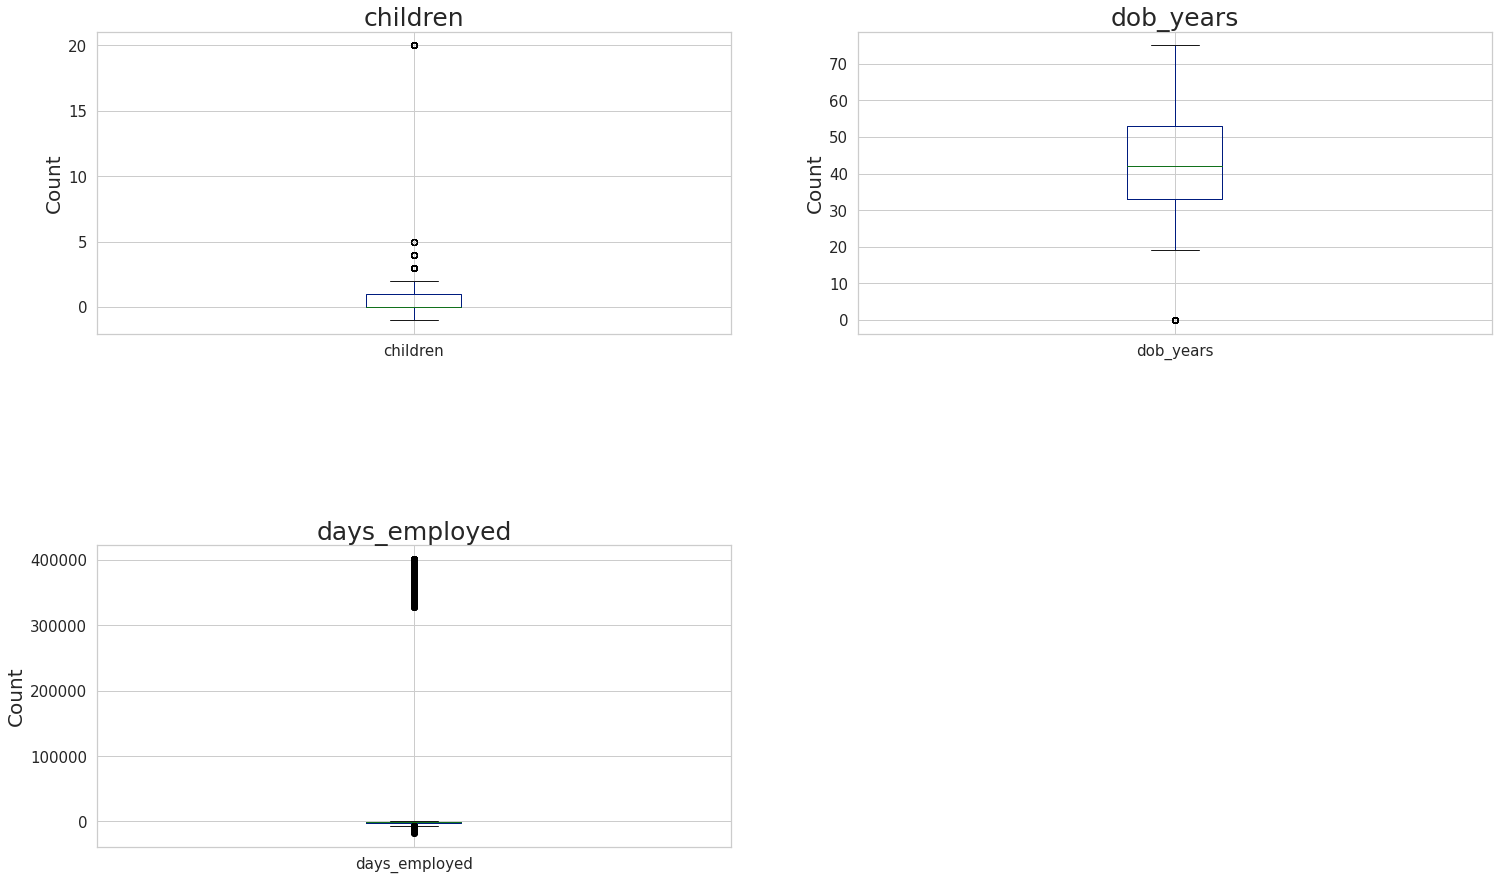

In [8]:
# initial boxplot charts
columns_required = ['children', 'dob_years', 'days_employed']
fig = plt.figure(figsize=(25, 15))
ncols = 2
nrows = 2
for i, column in enumerate(columns_required):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    ax.set_title(column, fontsize=25)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(labelsize=15)
    data[column].plot(kind='box')
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [9]:
# replacement the outliers in 'children' column with the 50th percentile - 0
data.loc[data['children'] == 20, 'children'] = 0
data.loc[data['children'] == -1, 'children'] = 0

In [10]:
# replacement the outliers in 'dob_years' column with the 50th percentile - 42
data.loc[data['dob_years'] == 0, 'dob_years'] = 42

In [11]:
# transform all values in 'days_employed' column to positive
data['days_employed'] = data['days_employed'].abs()

,children
count,"21,525.00"
mean,0.47
std,0.75
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,5.00


,dob_years
count,"21,525.00"
mean,43.49
std,12.22
min,19.00
25%,34.00
50%,42.00
75%,53.00
max,75.00


,days_employed
count,"19,351.00"
mean,"66,914.73"
std,"139,030.88"
min,24.14
25%,927.01
50%,"2,194.22"
75%,"5,537.88"
max,"401,755.40"


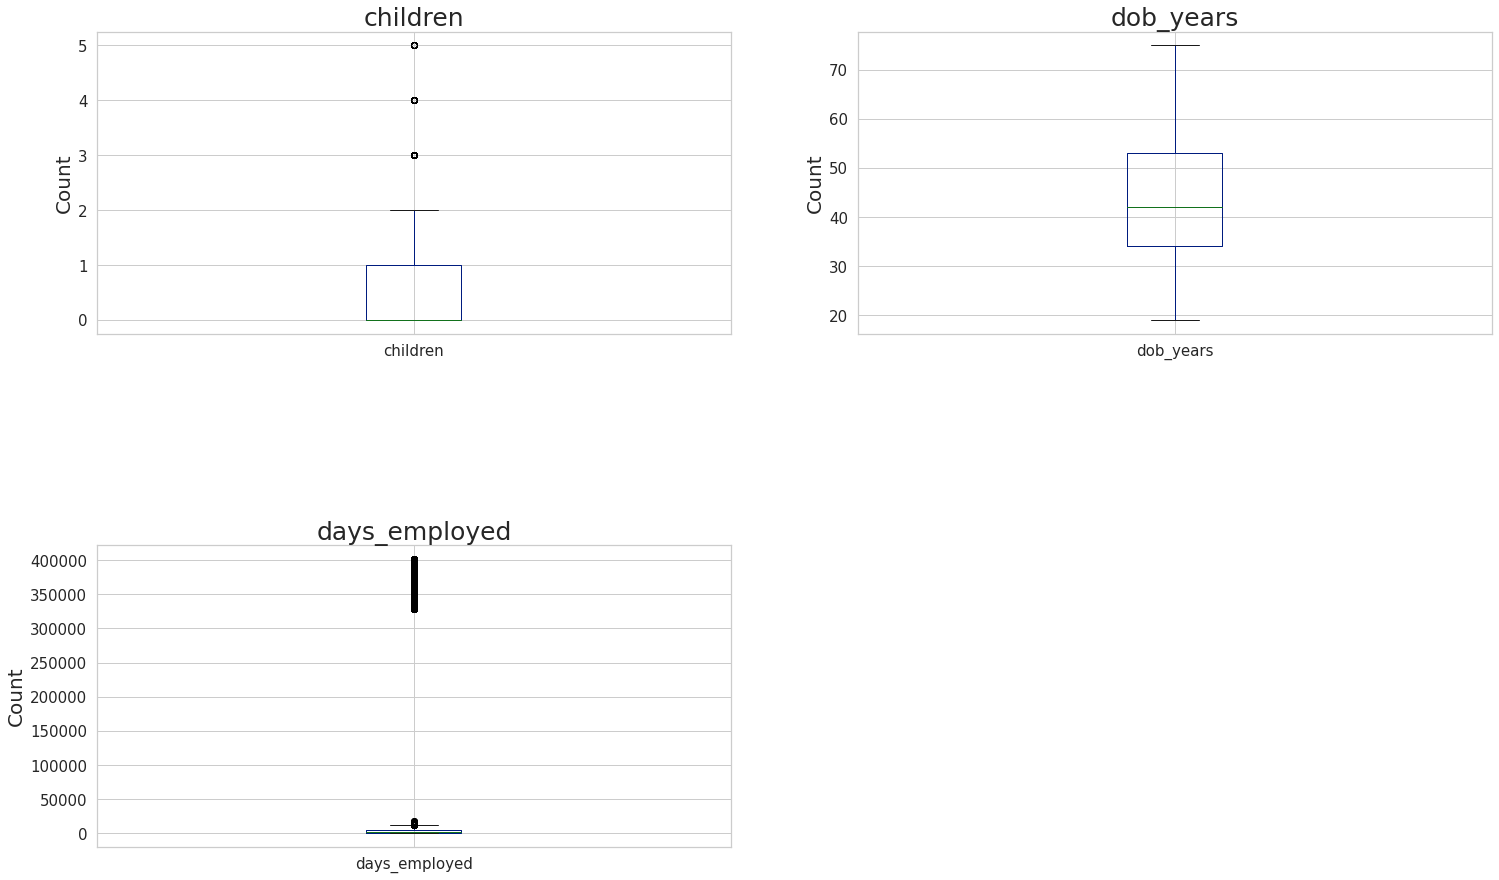

In [12]:
# resulting boxplot charts
columns_required = ['children', 'dob_years', 'days_employed']
fig = plt.figure(figsize=(25, 15))
ncols = 2
nrows = 2
for i, column in enumerate(columns_required):
    display(data[[column]].describe())
    ax = fig.add_subplot(nrows, ncols, i + 1)
    ax.set_title(column, fontsize=25)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(labelsize=15)
    data[column].plot(kind='box')
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [13]:
# unique values in 'gender' column
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [14]:
# replacement the wrong value with the most common - F
data.loc[data['gender'] == 'XNA', 'gender'] = 'F'

In [15]:
# check
data['gender'].unique()

array(['F', 'M'], dtype=object)

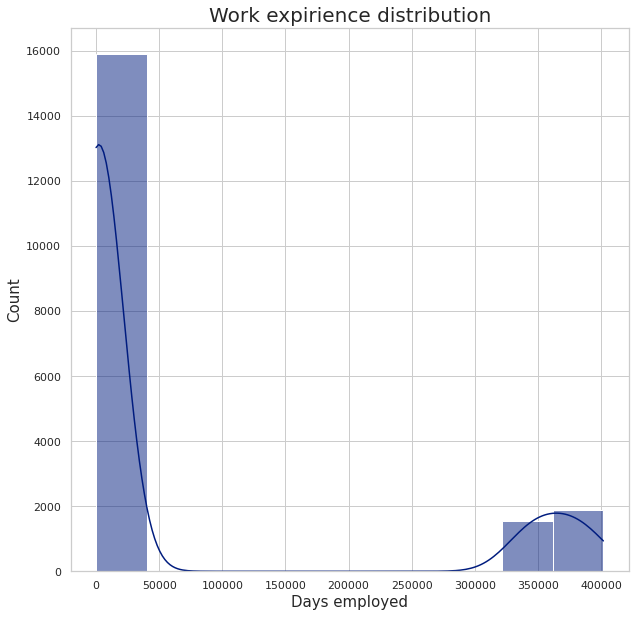

In [16]:
# histogram for 'days_employed' column 
sns.histplot(data['days_employed'], bins=10, kde=True)
plt.title('Work experience distribution', fontdict={'size':20})
plt.xlabel('Days employed', fontdict={'size':15})
plt.ylabel('Count', fontdict={'size':15});

It seems that some values in this column have been recorded in hours. We'll write a function to convert those values to days.

In [17]:
# convert function
def hours_to_days(hours):
    '''The function takes a value as an input. If the value is greater than 300000 (this value was chosen empirically)
    divides it by 24. Returns the new value.'''
    if hours > 300000:
        hours = hours / 24
    return hours

In [18]:
# applying the function to 'days_employed' column
data['days_employed'] = data['days_employed'].apply(hours_to_days)

,days_employed
count,"19,351.00"
mean,"4,641.64"
std,"5,355.96"
min,24.14
25%,927.01
50%,"2,194.22"
75%,"5,537.88"
max,"18,388.95"


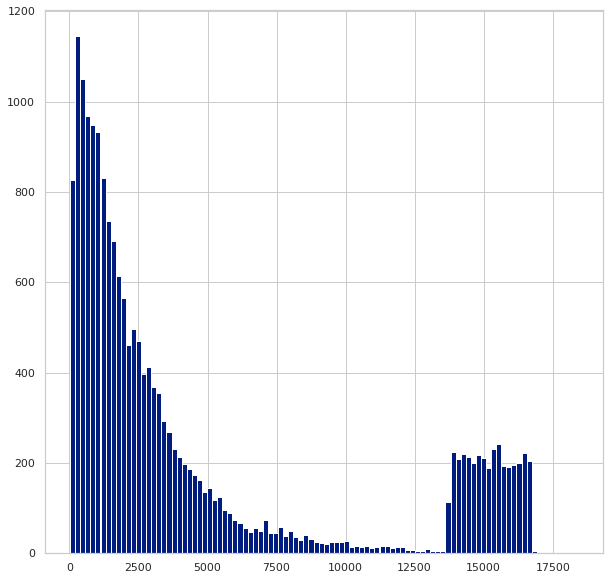

In [19]:
# check
display(data[['days_employed']].describe())
data['days_employed'].hist(bins=100);

So after applying the function we still have some values greater than 12500 days (34,2 years). We'll check this records (and relate these values to borrower's age).

In [20]:
# sample with work experience greater than 12500 days
data[data['days_employed'] > 12500].sample(20, random_state=666)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16289,0,"15,762.09",59,bachelor's degree,0,married,0,F,retiree,0,"27,545.61",to get a supplementary education
5707,0,"16,300.78",61,secondary education,1,unmarried,4,F,retiree,0,"7,599.56",purchase of the house for my family
16812,0,"14,758.79",60,secondary education,1,widow / widower,2,F,retiree,1,"8,282.71",car purchase
14932,0,"15,620.30",64,secondary education,1,widow / widower,2,F,retiree,0,"15,247.69",buy commercial real estate
14339,0,"14,688.57",56,secondary education,1,married,0,M,retiree,0,"23,959.39",purchase of my own house
16637,0,"16,595.37",62,secondary education,1,married,0,F,retiree,0,"12,306.98",transactions with my real estate
6809,1,"15,855.83",62,secondary education,1,married,0,F,retiree,0,"34,031.21",transactions with commercial real estate
9170,0,"15,436.31",55,secondary education,1,married,0,F,retiree,0,"24,788.76",getting higher education
21218,0,"16,478.33",48,secondary education,1,married,0,F,retiree,0,"18,749.92",purchase of the house for my family
21342,0,"16,401.93",63,secondary education,1,married,0,M,retiree,1,"30,036.67",education


Most people in this sample are over 50 years old. Hence days empolyed values are correct. 

## Missing values processing <a id='id21'></a>

In [21]:
# missing values calculation
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (100 * report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)
report.style.background_gradient('coolwarm')

,missing_values,% of total
children,0,0.000000
days_employed,2174,10.100000
dob_years,0,0.000000
education,0,0.000000
education_id,0,0.000000
family_status,0,0.000000
family_status_id,0,0.000000
gender,0,0.000000
income_type,0,0.000000
debt,0,0.000000


There are missing values in `days_employed` and `total_income` columns. We'll take a look at a sample to check any relatons between them.

In [22]:
# sample with days_employed NaN values
data[pd.isnull(data['days_employed'])].sample(20, random_state=777)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
11734,3,NaN,37,secondary education,1,married,0,F,employee,0,NaN,getting an education
11794,0,NaN,59,SECONDARY EDUCATION,1,married,0,F,employee,0,NaN,cars
16748,2,NaN,30,some college,2,married,0,F,business,0,NaN,supplementary education
3708,1,NaN,29,secondary education,1,divorced,3,F,employee,0,NaN,housing transactions
19479,2,NaN,34,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
7836,0,NaN,60,secondary education,1,divorced,3,F,retiree,0,NaN,buying my own car
16035,1,NaN,34,secondary education,1,married,0,F,employee,0,NaN,second-hand car purchase
7941,0,NaN,37,secondary education,1,unmarried,4,F,business,0,NaN,to get a supplementary education
8294,0,NaN,28,bachelor's degree,0,married,0,M,business,0,NaN,building a property
11917,1,NaN,31,secondary education,1,unmarried,4,F,employee,0,NaN,to buy a car


Based on the data sample missing values in the `total_income` column depend directly on the missing values in the `days_employed` column. We'll analyze the data with NaN values and try to figure out the reason its causes. 

In [23]:
# creating a new variable with NaN values
days_employed_nan = data[pd.isnull(data['days_employed'])]

In [24]:
# data analysis
percentiles= [.20, .40, .60, .80]
include=['object', 'float', 'int']
days_employed_nan.describe(percentiles = percentiles, include = include)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,"2,174.00",0.00,"2,174.00",2174,"2,174.00",2174,"2,174.00",2174,2174,"2,174.00",0.00,2174
unique,NaN,NaN,NaN,12,NaN,5,NaN,2,5,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,having a wedding
freq,NaN,NaN,NaN,1408,NaN,1237,NaN,1484,1105,NaN,NaN,92
mean,0.47,NaN,43.83,NaN,0.80,NaN,0.98,NaN,NaN,0.08,NaN,NaN
std,0.76,NaN,12.18,NaN,0.53,NaN,1.42,NaN,NaN,0.27,NaN,NaN
min,0.00,NaN,19.00,NaN,0.00,NaN,0.00,NaN,NaN,0.00,NaN,NaN
20%,0.00,NaN,32.00,NaN,0.00,NaN,0.00,NaN,NaN,0.00,NaN,NaN
40%,0.00,NaN,40.00,NaN,1.00,NaN,0.00,NaN,NaN,0.00,NaN,NaN
50%,0.00,NaN,43.00,NaN,1.00,NaN,0.00,NaN,NaN,0.00,NaN,NaN


**Conclusions**

It seems that the values distribution in this sample doesn't differ from the population distributions and also doesn't depend on any particular factor. So we'll consider this NaN values as MCAR (missing completely at random). Probably there are technical issues in the data collection.

We'll fill all NaN values based on the `dob_years` column since work experience and income depends usually on the age.   

The main steps:
* based on the `dob_years` column we'll define 4 age groups for our borrowers (using 20th, 50th and 75th percentiles in the  `dob_years` column)
* next we'll find the median work experience and median total income for each age group;
* finally we'll fill NaN values with founded medians;

In [25]:
# obtaining the 'dob_years' column percentiles
percentiles= [.20, .50, .75] 
data[['dob_years']].describe(percentiles = percentiles)

,dob_years
count,"21,525.00"
mean,43.49
std,12.22
min,19.00
20%,32.00
50%,42.00
75%,53.00
max,75.00


In [26]:
# age group distribution function
def age_group(dob_years):
    '''The function takes an age as an input and returns age_group (from 1 to 4) based on following rules:
        - 1st group if age value is <= 31 (31 included)
        - 2nd group if age value is between 31 and 42 (42 included)
        - 3rd group if age value is between 42 and 53 (53 included)
        - 4th group in all the other cases;
        '''
    if dob_years < 31:
        return 1
    if (dob_years > 31) and (dob_years <= 42):
        return 2
    if (dob_years > 42) and (dob_years <= 53):
        return 3
    return 4

Instead of the function we could use `pandas.cut(x, bins, labels=None)` method (bin values into discrete intervals) with following parameters:

`data['age_group'] = pd.cut(data['dob_years'], [0, 31, 42, 53, np.inf], labels=[1, 2, 3, 4])`

Bins parameter contains the criteria to bin by (in our case defines the exact bins to be used - (0, 31], (31, 42], (42, 53], (53, inf]).

In [27]:
# check
print(age_group(22))
print(age_group(40))
print(age_group(50))
print(age_group(74))

1
2
3
4


In [28]:
# applying the function to the dataframe
data['age_group'] = data['dob_years'].apply(age_group)

In [29]:
# check
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,"8,437.67",42,bachelor's degree,0,married,0,F,employee,0,"40,620.10",purchase of the house,2
1,1,"4,024.80",36,secondary education,1,married,0,F,employee,0,"17,932.80",car purchase,2
2,0,"5,623.42",33,Secondary Education,1,married,0,M,employee,0,"23,341.75",purchase of the house,2
3,3,"4,124.75",32,secondary education,1,married,0,M,employee,0,"42,820.57",supplementary education,2
4,0,"14,177.75",53,secondary education,1,civil partnership,1,F,retiree,0,"25,378.57",to have a wedding,3
5,0,926.19,27,bachelor's degree,0,civil partnership,1,M,business,0,"40,922.17",purchase of the house,1
6,0,"2,879.20",43,bachelor's degree,0,married,0,F,business,0,"38,484.16",housing transactions,3
7,0,152.78,50,SECONDARY EDUCATION,1,married,0,M,employee,0,"21,731.83",education,3
8,2,"6,929.87",35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,"15,337.09",having a wedding,2
9,0,"2,188.76",41,secondary education,1,married,0,M,employee,0,"23,108.15",purchase of the house for my family,2


In [30]:
# fill the missing values with median based on our age groups
print('Total days_employed missing values:', data['days_employed'].isna().sum())
print('Total total_income missing values:', data['total_income'].isna().sum())

for group in data['age_group'].unique():
    median_days_employed = data.loc[data['age_group'] == group, 'days_employed'].median()
    median_total_income = data.loc[data['age_group'] == group, 'total_income'].median()
    print(f'Group: {group}, days_employed median: {median_days_employed}, total_income median: {median_total_income}')
    data.loc[(data['days_employed'].isna()) & (data['age_group'] == group), 'days_employed'] = median_days_employed
    data.loc[(data['total_income'].isna()) & (data['age_group'] == group), 'total_income'] = median_total_income
        
print('days_employed check:', data['days_employed'].isna().sum())
print('total_income check:', data['total_income'].isna().sum())

Total days_employed missing values: 2174
Total total_income missing values: 2174
Group: 2, days_employed median: 1735.8184695884252, total_income median: 24873.635499999997
Group: 3, days_employed median: 2440.6178517647904, total_income median: 24134.3105
Group: 1, days_employed median: 1046.095163372449, total_income median: 22957.184999999998
Group: 4, days_employed median: 14073.67750259197, total_income median: 21181.719
days_employed check: 0
total_income check: 0


## Numerical data processing. Changing the data type. <a id='id22'></a>

In this section we'll cast the `days_employed` column to the 'int' type (astype method).

In [31]:
# applying astype method
data['days_employed'] = data['days_employed'].astype('int', copy=False, errors='ignore')

In [32]:
# check
data[['days_employed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   days_employed  21525 non-null  int64
dtypes: int64(1)
memory usage: 168.3 KB


## Duplicates processing <a id='id23'></a>

Based on the general information from the data we'll check the unique values in `education`, `income_type`, `family_status` and `purpose` columns (duplicates search). 

In [33]:
# education uniqie values
data['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [34]:
# family_status uniqie values
data['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [35]:
# income_type uniqie values
data['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [36]:
# purpose uniqie values
data['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

The data duplicates were foun in the `education` column (we'll use data.str.lower() method). The duplicates in `purpose` column we'll process using lemmatization.    
It can be assumed that the main reasons for these duplicates are: incorrect data connection from various sources and "human errors". 

In [37]:
# duplicates processing
data['education'] = data['education'].str.lower()

In [38]:
# check
data['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [39]:
# check and delete duplicates
print('Total duplicates before:', data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop=True)
print('Total duplicates after:', data.duplicated().sum())

Total duplicates before: 72
Total duplicates after: 0


## Lemmatization <a id='id24'></a>

In this section we'll lemmatize the `purpose` column in order to indentify the main loan purposes. We'll use pymystem3 library.   
Our first step - get the column unique values. Then we'll create a lemmatize function with replacing values in `purpose` column with one of the main loan purposes we found. 

In [40]:
# 'purpose' column unique values
data['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [41]:
# lemmatization
lemmas = m.lemmatize(' '.join(data['purpose'].unique()))

In [42]:
# the most common lemmas
Counter(lemmas).most_common()

[(' ', 121),
 ('a', 9),
 ('car', 8),
 ('education', 7),
 ('real', 7),
 ('estate', 7),
 ('purchase', 6),
 ('to', 6),
 ('of', 5),
 ('transactions', 4),
 ('my', 4),
 ('buy', 4),
 ('own', 4),
 ('property', 4),
 ('house', 3),
 ('wedding', 3),
 ('housing', 3),
 ('buying', 3),
 ('the', 2),
 ('supplementary', 2),
 ('for', 2),
 ('commercial', 2),
 ('building', 2),
 ('second', 2),
 ('-', 2),
 ('hand', 2),
 ('with', 2),
 ('getting', 2),
 ('university', 2),
 ('have', 1),
 ('having', 1),
 ('family', 1),
 ('residential', 1),
 ('construction', 1),
 ('cars', 1),
 ('become', 1),
 ('educated', 1),
 ('an', 1),
 ('ceremony', 1),
 ('get', 1),
 ('higher', 1),
 ('profile', 1),
 ('renting', 1),
 ('out', 1),
 ('renovation', 1),
 ('going', 1),
 ('\n', 1)]

Based on the lemmas we found provide *four loan purposes*: real_estate, vehicle, education, wedding. 

In [43]:
# replacing function
def pure_purpose(purpose):
    '''The function takes dataframe row as an input and lemmatize it. Based on the lemmas obtained returns one of the
    four loan purposes.'''
    lem_purpose = m.lemmatize(purpose)
    if 'car' in lem_purpose or 'cars' in lem_purpose:
        return 'vehicle'
    if 'wedding' in lem_purpose:
        return 'wedding'
    if 'education' in lem_purpose or 'university' in lem_purpose or 'educated' in lem_purpose:
        return 'education'
    if 'housing' in lem_purpose or 'property' in lem_purpose or 'estate' in lem_purpose or 'house' in lem_purpose:
        return 'real_estate'
    return purpose

In [44]:
# check on the data sample
data_test_sample = data.sample(50, random_state=555)
data_test_sample['test_purpose'] = data['purpose'].apply(pure_purpose)
with pd.option_context('display.max_rows', None):
    display(data_test_sample)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,test_purpose
8475,0,2923,51,secondary education,1,widow / widower,2,F,employee,0,"22,547.83",car,3,vehicle
7220,0,2384,24,secondary education,1,unmarried,4,M,business,0,"15,620.79",housing transactions,1,real_estate
2568,2,3839,41,secondary education,1,married,0,M,employee,0,"25,889.24",second-hand car purchase,2,vehicle
9061,0,1770,47,secondary education,1,married,0,F,employee,0,"17,471.40",going to university,3,education
19360,0,3876,37,secondary education,1,married,0,M,business,0,"47,615.15",building a real estate,2,real_estate
13652,1,404,42,bachelor's degree,0,married,0,M,employee,1,"27,259.16",building a property,2,real_estate
15326,2,1824,49,secondary education,1,married,0,M,employee,1,"26,453.29",purchase of my own house,3,real_estate
18297,2,1359,40,some college,2,married,0,M,employee,0,"80,621.05",building a property,2,real_estate
14718,0,14877,63,secondary education,1,unmarried,4,F,retiree,0,"33,469.95",transactions with my real estate,4,real_estate
939,0,1982,57,secondary education,1,civil partnership,1,F,civil servant,0,"16,145.08",having a wedding,4,wedding


In [45]:
# applying the function to the data
data['purpose'] = data['purpose'].apply(pure_purpose)

In [46]:
# check 'purpose' column unique values
data[['purpose']].value_counts()

purpose    
real_estate    10811
vehicle         4306
education       4013
wedding         2323
dtype: int64

The most common loan purpose is real estate transactions. 

## Data categorization and encoding <a id='id25'></a>

In this section we'll determine for groups the of borrower's income based on the `total_income` column and its percentiles values. In this case we'll use `pandas.qcut()` method - discretize variable into equal-sized buckets based on rank or based on sample quantiles.   
Also we'll encode `gender`, `purpose` and `income_type` columns using Sclearn library and its LabelEncoder and `children` column using a new function.

In [47]:
# 'total_income' percentiles
percentiles= [.20, .50, .75] 
data[['total_income']].describe(percentiles = percentiles)

,total_income
count,"21,453.00"
mean,"26,448.37"
std,"15,688.15"
min,"3,306.76"
20%,"15,765.94"
50%,"23,347.06"
75%,"31,331.01"
max,"362,496.65"


In [48]:
# income groups creating
data['income_group'] = pd.qcut(data['total_income'], q=4, labels=[1, 2, 3, 4])

In [49]:
# gender_id, purpose_id and income_type_id creating
data['gender_id'] = le.fit_transform(data.gender.values)
data['purpose_id'] = le.fit_transform(data['purpose'])
data['income_type_id'] = le.fit_transform(data['income_type'])

In [50]:
# function for categorization 'children' column
def children_group(children):
    if children < 1:
        return 0
    elif 1 <= children < 3:
        return 1
    else:
        return 2

In [51]:
# applying to the 'children' column
data['children_group'] = data['children'].apply(children_group)

In [52]:
# check
data.sample(10, random_state=999)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_group,gender_id,purpose_id,income_type_id,children_group
17146,0,15358,60,secondary education,1,unmarried,4,F,retiree,0,"9,409.91",real_estate,4,1,0,1,5,0
20384,0,1046,28,secondary education,1,married,0,M,employee,0,"22,957.18",education,1,2,1,0,2,0
16377,0,15537,63,secondary education,1,married,0,M,retiree,0,"27,761.59",real_estate,4,3,1,1,5,0
10971,0,2903,47,bachelor's degree,0,unmarried,4,M,business,0,"66,668.97",real_estate,3,4,1,1,0,0
11125,0,1114,47,bachelor's degree,0,civil partnership,1,F,employee,0,"33,777.11",education,3,4,0,0,2,0
16313,0,16548,66,secondary education,1,married,0,M,retiree,0,"19,484.70",real_estate,4,2,1,1,5,0
4027,0,3233,47,bachelor's degree,0,civil partnership,1,F,employee,0,"32,750.23",wedding,3,4,0,3,2,0
4948,1,2383,46,secondary education,1,married,0,M,business,0,"61,339.86",real_estate,3,4,1,1,0,1
19179,2,274,30,bachelor's degree,0,married,0,F,employee,0,"38,721.83",vehicle,1,4,0,2,2,1
10857,1,3764,44,secondary education,1,married,0,M,business,0,"20,630.62",real_estate,3,2,1,1,0,1


##  Interim conclusions <a id='id26'></a>   

In this section we've:

* found and processed data artifacts - `children`, `dob_years`, `gender` columns;
* transformed negative values to positive in `days_employed` column;
* changed the data type to integer in `days_employed` column;
* found and processed duplicates in the categorical data - `education` column;
* found and filled missing values (10,1% of total) in the `days_employed` and `total_income` columns;
* categorized borrower's age and their total income to four groups based on the percentiles in this columns;
* encoded `gender`, `children` and `income_type` columns using LabelEncoder and our own function;
* lemmatized `purpose column` and provided four main loan purposes: wedding, vehicle, real_estate and education.

# Exploratory Data Analysis (EDA) <a id='id3'></a>

In this secton we'll answer following questions:

- Is there a correlation between having children and loan repayment?
- Is there a correlation between client's marital status and loan repayment?
- Is there a correlation between client's income and loan repayment?
- How different loan purposes have an impact on its repayment?

We'll answer these questions using pivot tables and Spearman correlation.    

*Pivot tables*: We have 2 options in the `debt` column - 0 and 1. Hence we colud use specified parameter (children, marital status etc.) as an `index` and `debt` column as a `values` and build a pivot table that calculate mean by deafult (parameter `aggfunc`). So we'll get the loan payment delay probability depending on borrower's category in the specified parameter (children/marital status/income.)     
*Spearman correlation*: `DataFrame.corr(method='pearson', min_periods=1)` - compute pairwise correlation of columns, excluding NA/null values.

###  Is there a connection between having kids and repaying a loan on time? <a id='id31'></a>

In [53]:
# pandas customization
pd.set_option('display.float_format', '{:,.3f}'.format)

In [54]:
# pivot table for children parameter
data.pivot_table(index=['children'], values='debt')

,debt
children,
0,0.075
1,0.092
2,0.095
3,0.082
4,0.098
5,0.000


In [55]:
# using Spearman correlation
display(data[['children_group', 'debt']].corr(method='spearman'))
data[['children', 'debt']].corr(method='spearman')

,children_group,debt
children_group,1.000,0.029
debt,0.029,1.000


,children,debt
children,1.000,0.029
debt,0.029,1.000


### Conclusion

A relation between having kids and repaying a loan on time is weak but people without kids have less problems with repaying a loan on time. According to the pivot table debt risk without kids is 7,5% against 9,2% with one child. For families with 4 children we see the maximum probability of debt - 9,8%. This can be explained by the fact that families with kids have higher expenditure rate which could create precarious financial situations.

### Is there a connection between marital status and repaying a loan on time? <a id='id32'></a>

In [56]:
# pivot table for marital status 
data.pivot_table(index=['family_status'], values='debt')

,debt
family_status,
civil partnership,0.093
divorced,0.071
married,0.075
unmarried,0.098
widow / widower,0.066


In [57]:
# using Spearman correlation
data[['family_status_id', 'debt']].corr(method='spearman')

,family_status_id,debt
family_status_id,1.000,0.023
debt,0.023,1.000


### Conclusion

Spearman coefficient shows us a weak correlation. According to the pivot table the highest debt risk have clients with 'unmarried' (9,8%) and 'civil partnership' (9,3%) status. The lowest risk have widow\widower (6,6%) and divorced group (7,1%). It can be assumed that widows and widowers belong to the old age group and plan their budgets more wisely. The same can be said about 'married' and 'divorced' categories: they have more stable income and expenses.

### Is there a connection between income and repaying a loan on time? <a id='id33'></a>

In [58]:
# pivot table for income
data.pivot_table(index=['income_group'], values='debt')

,debt
income_group,
1,0.080
2,0.087
3,0.087
4,0.071


In [59]:
# using Spearman correlation
data['income_group'] = data['income_group'].astype('int', copy=False, errors='ignore')
data[['income_group', 'debt']].corr(method='spearman')

,income_group,debt
income_group,1.000,-0.010
debt,-0.010,1.000


### Conclusion

There is a weak negative correlation, but it close to zero. Pivot table shows us a lower debt risk in 4th and 1st total income categories. 4th category - borrowers with the highest total income intuitively have the lowest debt risk (7,2%). However the second place takes 1st group (the lowest total income). It can be assumed that the borrowers with low income plan their budget more carefully, probably save more. Еherefore they're less often in debt (7.9% probability). The 2nd and 3rd total income categories have 8,5% and 8,6% debt risk respectively. 

### Is there a connection between education and repaying a loan on time? <a id='id35'></a>

In [60]:
# pivot table for education
data.pivot_table(index=['education'], values='debt')

,debt
education,
bachelor's degree,0.053
graduate degree,0.000
primary education,0.110
secondary education,0.090
some college,0.091


In [61]:
# using Spearman correlation
data[['education_id', 'debt']].corr(method='spearman')

,education_id,debt
education_id,1.000,0.057
debt,0.057,1.000


### Counclusion

There is a weak correlation between education and a debt risk. According to the pivot table there is 0% risk of the debt between clients with a graduate degree. The highest risk have clients with primary education (11%). Generally debt risk moves in relation to the borrower's education. 

### Is there a connection between income type and repaying a loan on time? <a id='id36'></a>

In [62]:
# pivot table for income_type
data.pivot_table(index=['income_type'], values='debt')

,debt
income_type,
business,0.074
civil servant,0.059
employee,0.096
entrepreneur,0.000
paternity / maternity leave,1.000
retiree,0.056
student,0.000
unemployed,0.500


In [63]:
# using Spearman correlation
data[['income_type_id', 'debt']].corr(method='spearman')

,income_type_id,debt
income_type_id,1.000,-0.004
debt,-0.004,1.000


### Conclusion

There is a sertain relationship between borrower's income type and a debt risk. The highest risk expectedly have clients in paternity\maternity leave (100%) and unemployed (50%). It's curious to note that risk for students category is 0%. 

### How do different loan purposes affect on-time loan repayment? <a id='id34'></a>

In [64]:
# pivot table for purpose
data_pivot_purpose = data.pivot_table(index=['purpose'], values='debt').round(3)
data_pivot_purpose

,debt
purpose,
education,0.092
real_estate,0.072
vehicle,0.094
wedding,0.080


In [65]:
# using Spearman correlation
data[['purpose_id', 'debt']].corr(method='spearman')

,purpose_id,debt
purpose_id,1.000,0.001
debt,0.001,1.000


### Conclusion

According to the pivot table debt risk is higher for 'vehicle' and 'education' purposes(9,4% and 9,2%) and lower for 'wedding' category (8,0%). The lowest risk has 'real_estate' category (7,2%). Probably real estate transactions cost much more than wedding or education therefore clients plan their budget more carefully. 
According to the Spearman coefficient there is weak relation between purpose of loan and debt.

# General conclusion <a id='id7'></a> 

<div style="border:solid green 2px; padding: 20px">

In this project we've figured out whether specified client features affect the loan on time repayment. The data we've worked with was clients solvency statistics from the bank. The result of the research will be taken in the credit scoring model - a special system that evaluates the ability of a potential borrower to repay the loan.     
        
**The main points in data preprocessing:**

* data artifacts processing;
* transformation negative values to positive in `days_employed` column;
* changing the data type to integer in `days_employed` column;
* duplicates and missing values processing;
* data categorization (borrower's age, gender, children, income, loan purpose);
* loan purposes lemmatization;
    
Missing values in the `days_employed` column make up 10% of total records and have a strong relation with the missing values in `total_income` column. We consider this NaN values as MCAR and fill them with the group medians we've calculated. The gorups were created based on the `dob_years` column (borrower's age). We assume that there are some technical issues in the data collection.     
Negative and in the same time positive values in the `days_employed` column may be caused by the data collection from several data sources. That should be fixed. 

**The main points in the EDA:**

According to the Spearman coefficients and pivot tables there is a weak correlation between specified borrower's features and a debt risk. Probably there is a correlation in case of multiple features at the same time.      
Generally a higher debt risk have clients with children, 'civil partnership' or 'unmarried' as a marital status and 'vehicle' or 'education' as a loan purpose. Unmarried and widow\widower clients and clients with high income pay their loan most commonly on time.      
The highest correlation was identified betweeen a debt and an education (borrowers with basic education have the highest debt risk - 11%) and also between a debt and a income type (maternity leave - 100% risk, unemployed - 50%). It is curious to note that clients with a basic education logically may have 'education' as a loan purpose that increases their 'in debt' probability even more. Therefore it's colud be difficult for them to get a loan approval from a bank.     
    
**Recomendations:**
    
- fix technical issues during the data collection;
- investigate the reasons of the incomplete income and days employed records;
- specify loan purposes more strictly;
- encode clients total income, income type, gender, children and purpose information; 